<a href="https://colab.research.google.com/github/ikhwandio4/Machine_Learning_sem5/blob/main/js9ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama:ikhwandi**

**Nim:2241720028**

**kelas:3F**

**matkul:ML**

**Job Sheet 9: Perceptron dan ANN**



#Praktikum 1
Klasifikasi Iris dengan Perceptron

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

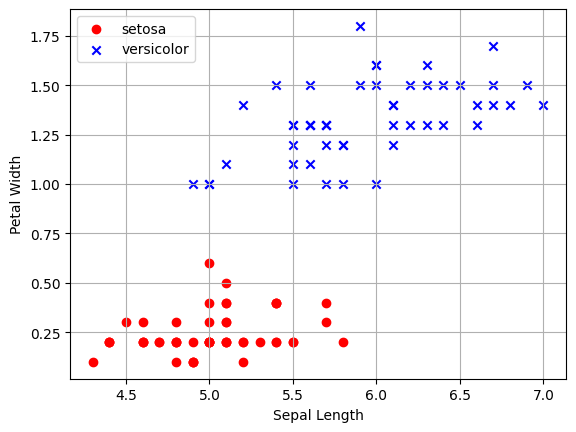

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV dengan header
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/js6/iris.csv')

# Filter spesies
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Menentukan kolom untuk scatter plot (a=0 untuk ID, b=3 untuk Petal Width)
a, b = 'SepalLengthCm', 'PetalWidthCm'

# Scatter plot
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Menambahkan label sumbu
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

# Menambahkan legenda
plt.legend(loc='upper left')

# Menambahkan grid
plt.grid()

# Menampilkan plot
plt.show()


**Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        """
        eta: learning rate (antara 0.0 dan 1.0)
        n_iter: jumlah epoch (iterasi data pelatihan)
        """
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Melatih model menggunakan dataset X dan target y.
        X: Data pelatihan (array [n_samples, n_features])
        y: Target (array [n_samples])
        """
        # Inisialisasi bobot dengan nilai nol, termasuk bias
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # Proses pelatihan
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Hitung pembaruan bobot
                self.w_[0] += update  # Pembaruan bias (w0)
                self.w_[1:] += update * xi  # Pembaruan bobot fitur
                errors += int(update != 0.0)  # Hitung kesalahan jika ada pembaruan
            self.errors_.append(errors)  # Simpan kesalahan per epoch
        return self

    def net_input(self, X):
        """Hitung input bersih: perkalian dot antara fitur dan bobot."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Kembalikan label kelas setelah aktivasi unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
X = df.iloc[0:100, [1, 4]].values  # SepalLengthCm, PetalLengthCm
y = df.iloc[0:100, 5].values

# Mengkonversi label target ke bentuk numerik (-1 untuk setosa, 1 untuk versicolor)
y = np.where(y == 'Iris-setosa', -1, 1)

**Langkah 5 - Fitting Model**

In [ ]:
# Cell 5: Inisialisasi dan training model
ppn = Perceptron(eta=0.1, n_iter=10)  # Inisialisasi model Perceptron
ppn.fit(X, y)  # Melatih model dengan data X dan label y


**Langkah 6 - Visualisasi Nilai Error Per Epoch**

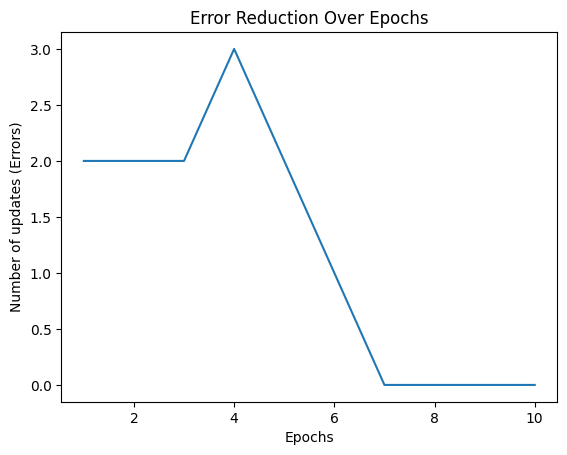

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.title('Error Reduction Over Epochs')
plt.show()

**Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-7-f29b96a77f25>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


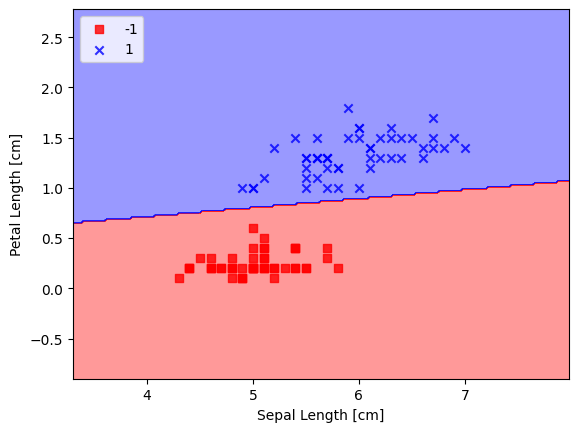

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

# praktikum 2


Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.


**Langkah 1 import librari**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2-Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 Ekstaraksi Fitur dan buat model perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Penjelasan


Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

# Praktikum 3

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

langkah 1

In [ ]:
from sklearn.neural_network import MLPClassifier

langkah 2

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

langkah 3

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

langkah 4

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# praktikum 4

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

pra pengolahan data

langkah 1-import library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

langkah 2-load data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/js 9/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


langkah 3- encoding dan kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

langkah 4- encoding kolom "geography" dengan one hot encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

langkah 5-split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

langkah 6-scaling fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# membuat model ann

langkah 1-inisialisasi model ann

In [ ]:
ann = tf.keras.models.Sequential()

langkah 2-membuat input layer dan hidden layer pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

langkah 3-membuat hidden layer kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

langkah 4 - membuat output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# training model

langkah 1-compile model(menyatukan arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

langlah 2- Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6519 - loss: 0.6320
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4778
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7954 - loss: 0.4448
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8019 - loss: 0.4435
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8071 - loss: 0.4269
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4107
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8235 - loss: 0.4062
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.3959
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8286 - loss: 0.4028
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8241 - loss: 0.4000
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8276 - loss: 0.3980
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## **Membuat Prediksi**

Diberikan informasi sebagai berikut,

* Geography: France

* Credit Score: 600

* Gender: Male

* Age: 40 years old

* Tenure: 3 years

* Balance: $ 60000

* Number of Products: 2

* Does this customer have a credit card ? Yes

* Is this customer an Active Member: Yes

* Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

modelkan data baru dan buat prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[False]]


prediksi dengan data testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


cek akurasi dan confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 195  210]]


0.8635

# Tugas

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

Metode pra pengolahan

* Pemilihan fitur

* Arsitektur ANN

* Fungsi Aktiviasi

* ANN diimplementasikan dengan menggunakan tensorflow.

DIKERJAKAN SECARA BERKELOMPOK

JELASKAN HASIL YANG ANDA DAPATKAN,

* AKURASI

* CONFUSION MATRIX

* KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Langkah 1: Memasukkan Pustaka yang Diperlukan**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


**Langkah 2: Memuat Dataset MNIST**

Bentuk x_train: (60000, 28, 28), y_train: (60000,)
Bentuk x_test: (10000, 28, 28), y_test: (10000,)


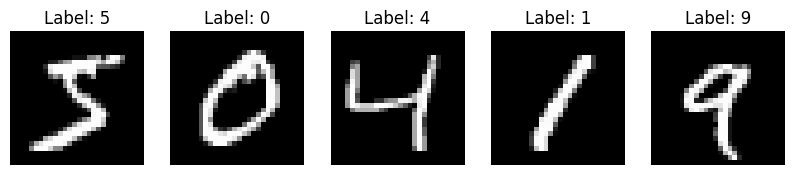

In [20]:
# Memuat dataset MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Memeriksa bentuk data
print(f'Bentuk x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'Bentuk x_test: {x_test.shape}, y_test: {y_test.shape}')

# Menampilkan beberapa contoh gambar
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y_train[i]}')
plt.show()


**Langkah 3: Pra-pengolahan Data**

In [21]:
# Normalisasi data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Mengubah bentuk data menjadi (jumlah contoh, fitur)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Memeriksa bentuk data setelah pra-pengolahan
print(f'Bentuk x_train setelah normalisasi: {x_train.shape}')
print(f'Bentuk x_test setelah normalisasi: {x_test.shape}')

# Memisahkan data latih menjadi latih dan validasi
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Bentuk x_train setelah normalisasi: (60000, 784)
Bentuk x_test setelah normalisasi: (10000, 784)


**Langkah 4: Membangun Model ANN**

In [22]:
# Membangun model ANN
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 kelas untuk 10 digit
])

# Mengkompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Langkah 5: Melatih Model**

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8631 - loss: 0.4735 - val_accuracy: 0.9576 - val_loss: 0.1419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9667 - loss: 0.1136 - val_accuracy: 0.9663 - val_loss: 0.1115
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9773 - loss: 0.0749 - val_accuracy: 0.9712 - val_loss: 0.0957
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0562 - val_accuracy: 0.9693 - val_loss: 0.1067
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9871 - loss: 0.0440 - val_accuracy: 0.9757 - val_loss: 0.0860
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9759 - val_loss: 0.0927
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9910 - loss: 0.0262 - val_accuracy: 0.9735 - val_loss: 0.1033
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9926 - loss: 0.0231 -

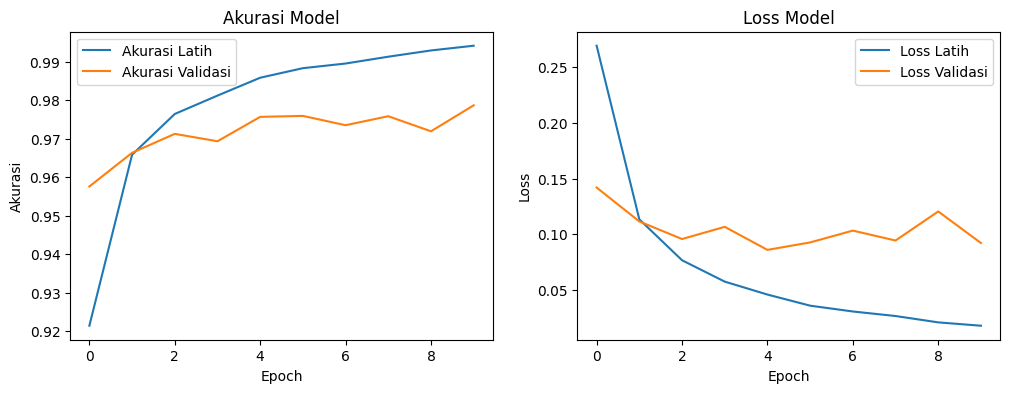

In [23]:
# Melatih model dan menyimpan riwayat
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot Akurasi dan Loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot Akurasi
axes[0].plot(history.history['accuracy'], label='Akurasi Latih')
axes[0].plot(history.history['val_accuracy'], label='Akurasi Validasi')
axes[0].set_title('Akurasi Model')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Akurasi')
axes[0].legend()

# Plot Loss
axes[1].plot(history.history['loss'], label='Loss Latih')
axes[1].plot(history.history['val_loss'], label='Loss Validasi')
axes[1].set_title('Loss Model')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()


**Langkah 6: Evaluasi Model**

In [24]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Akurasi pada data uji: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.1071
Akurasi pada data uji: 0.9799


**Langkah 7: Menghitung Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


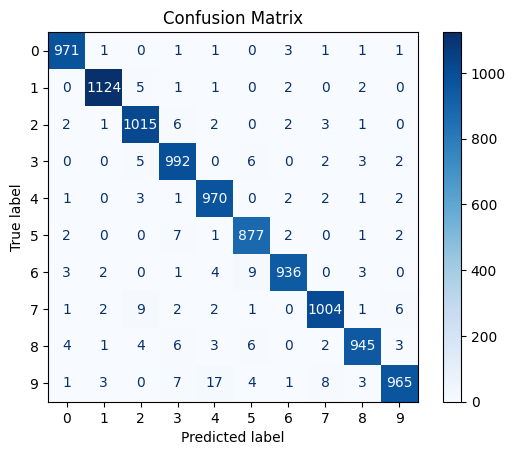

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
# Menghitung prediksi seluruh data uji
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Membuat dan menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))
